## IE6511 Homework 1 
Done by: Aloisius Stephen and Yang Xiaozhou

In [144]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Homework on Genetic Algorithm

1. A binary string of length 4 <br> <br>

2.  Parent one before crossover: 0010, after crossover: 0010<br>
    Parent two before crossover: 0011, after crossover: 0011<br> <br>
    Parent three before crossover: 0011, after crossover: 1011<br>
    Parent four  before crossover: 1010, after crossover: 0010 <br><br>

3. Pair one children: 0010 and 0011 <br>
   Pair two children: 1011 and 0010 <br> <br>

4. After mutation, <br>
   Pair one children: 0000 and 0001 <br>
   Pair two children: 1001 and 0000 <br> <br>

5. x and f(x) values of children: <br>
    children one, x = 0, f(x) = 0 <br>
    children two, x = 1, f(x) = 1 <br>
    children three, x = 9, f(x) = 6561 <br>
    children four, x = 0, f(x) = 0 <br>

    Total f(x) = 6561+ 1 = 6562

    Probability of being selected: <br>
    children one, p = 0 <br>
    children two, p = 1/6562 <br>
    children three, p = 6561/6562 <br>
    children four, p = 0 <br> <br>

6. Binary strings of parents: <br>
    Parent one: 0110 0010 1001 <br>
    Parent two: 0001 0010 0011 <br>
    
    Children binary strings, x value (Crossover point 3): <br>
    Children one: 0111 0010 0001, x = (7,2,9) <br>
    Children two: 0000 0010 1011, x = (0,2,3) <br>
    
    
    


## Simulated Annealing

### 2. SA Parameter Selection when cost function range = (MaxCost and MinCost) are known
<!--no code-->

a) 
\begin{align}
avg \Delta cost &= 0.25(MaxCost - MinCost) \\
&= 25
\end{align}

\begin{align}
T_0 &= - \frac{avg \Delta cost}{\ln P1} \\
\end{align}

In [2]:
P_1 = 0.4
T_0 = -25/ np.log(P_1)
print("T_0: %.4f" %T_0)

T_0: 27.2839


b)
\begin{align}
T_0 &= - \frac{0.25(MaxCost - MinCost)}{\ln P1} \\
\end{align}

c)
\begin{align}
T_{final} &= - \frac{0.25(MaxCost - MinCost)}{\ln P2} \\
\end{align}

d)
\begin{align}
\alpha &= \left \{- \frac{0.25(MaxCost - MinCost)}{T_0 \ln P2} \right \}^\frac{1}{G} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{200}
\end{align}

In [3]:
alpha = np.power(-25/(100*np.log(0.001)), 1/200)
print("Alpha: %.4f" %alpha)

Alpha: 0.9835


e)
\begin{align}
\alpha &= \left \{- \frac{0.25(MaxCost - MinCost)}{T_0 \ln P2} \right \}^\frac{1}{G\div M} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{200 \div 10} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{20}
\end{align}

In [4]:
alpha = np.power(-25/(100*np.log(0.001)), 1/20)
print("Alpha: %.4f" %alpha)

Alpha: 0.8471


### 3. SA Parameter Selection when you have computed AP cost values (no coding necessary)  
<!--no code-->
Use Method 2 to estimate AvgΔCost. Assume you are running an SA optimization trial and you have picked AP = 6 points which are 1,2,3,4,5,6.  The values you have are Cost (j) = 40, 60, 50, 65, 75, 45 for j=1,2,3,4,5,6 respectively. Assume all the points 1 to 6 are neighbors of each other. What value would you take for the initial value S0 for your SA search?  Estimate a value of T0 that would give you P1 of 0.9 using Method 2 for estimating AvgΔCost.  (Assume the constant M=1.)

In [14]:
S_0 = 1
Avg_Diff_Cost = 1/5 * np.sum([x-40 for x in [60, 50, 65, 75, 45]])
P_1 = 0.9
T_0 = -Avg_Diff_Cost/ np.log(P_1)
print("T_0: %.4f" %T_0)

T_0: 180.3332


In [15]:
Avg_Del_Cost

19.0

### 4. SA Implementation (requires writing a Simulated Annealing code, preferably in python, matlab or  C)  Instructions below are for Matlab.
<!--CODING-->

Write a Matlab function called cost.m that returns the value of the above function.  The input argument should be S (a vector).
  
Define the neighborhood function using a function called neighbor.m.  The neighborhood should be randomly perturb one of the two decision variables current value between max(s-25,0) and min(s+25, 127). Note that the neighborhood function should not select s as a neighbor of itself, i.e. neighbor(s) ≠ s. If you wish, it may be easier to code this if you select the decision variable to be perturbed within the SA code and then call neighbor.m to make the one-dimensional perturbation.  Note that in general, as problems increase in dimension, the definition of the neighborhood can become more complex.

Submit a printout of the code for SA.m, cost.m and neighbor.m.  Debug thoroughly as you will reuse the SA code in future homeworks!  If you care to return other output variables from SA.m, such as scurrent (perhaps for debugging/interest), please output them to additional output variables (not solution or BestS) that you define in your SA code.

In [207]:
def cost(S):
    
    cost = np.power(10,9)-(625-np.power(S[0]-25, 2))*(1600-np.power(S[1]-10, 2))*np.sin((S[0])*np.pi/10)*np.sin((S[1])*np.pi/10)
    
    return cost  

cost([3,4])

999830324.228912

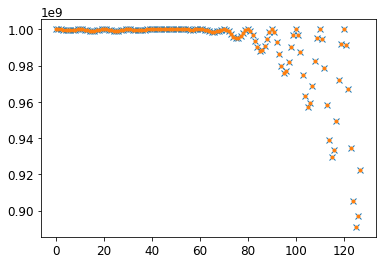

In [17]:
s = []
s.append(np.arange(0,128))
s.append(np.arange(0,128))

f1 = plt.plot(s[0],cost(s), 'x')

f2 = plt.plot(s[1],cost(s), '.')

In [153]:
def neighbor(S):
    
    neighbor = S
    pos = np.random.randint(0, 2) # randomly pick one of the two decision variables
    nei_value = S[pos]
    while nei_value == S[pos]:
        # randomly generate a neighbor value
        nei_value = np.random.randint(max(S[pos]-25, 0), min(S[pos]+25, 127)+1)
        pass
    neighbor[pos] = nei_value # form the neighbor
    
    return neighbor

neighbor([0,5])

[0, 7]

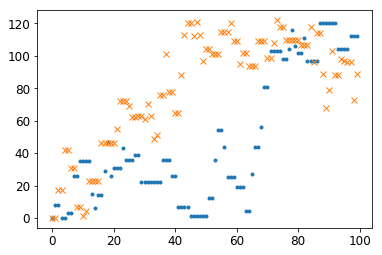

In [38]:
s = pd.DataFrame([[0,0]], columns = ["s1", "s2"], index = range(100))
iteration = []
iteration.append(0)

for i in range (1,100):
    iteration.append(i)
    s.iloc[i] = s.iloc[i-1]
    s.iloc[i] = neighbor(s.iloc[i])

plt.plot(iteration,s.s1, '.')
plt.plot(iteration,s.s2, 'x')

In [136]:
def SA(S_initial, T_initial, alpha, beta, M, Max_time):
    
    solution = np.zeros([Max_time,3])

    T = T_initial
    CurS = S_initial
    BestS = CurS
    CurCost = cost(CurS)
    BestCost = CurCost
    time = 0

    while time < Max_time:

        for i in range(0, M):
            NewS = neighbor(CurS)
            NewCost = cost(NewS)
            diff_cost = NewCost - CurCost
            
            if diff_cost < 0:
                CurS = NewS
                CurCost = NewCost
                if NewCost < BestCost:
                    BestS = NewS
                    BestCost = NewCost
            elif np.random.random() < np.exp(-diff_cost/T): 
                CurS = NewS
                CurCost = NewCost
                
            solution[time+i,0]=time+i+1
            solution[time+i,1]=CurCost
            solution[time+i,2]=BestCost
        
        time = time + M
        T = alpha*T
        M = beta*M
        
        
    solution = solution.transpose()
    solution = pd.DataFrame({"Iteration_Number":solution[0], "Current_Cost": solution[1], "Best_Cost" : solution[2]})
    solution = solution[['Iteration_Number', 'Current_Cost', 'Best_Cost']]


    return (solution, BestS)

In [322]:
np.random.seed(100)
solution, BestS = SA([1,1], 100, 0.9, 1, 1, 1000)

In [323]:
print(solution)
print(BestS)

     Iteration_Number  Current_Cost     Best_Cost
0                 1.0  9.997214e+08  9.997214e+08
1                 2.0  9.992361e+08  9.992361e+08
2                 3.0  9.992361e+08  9.992361e+08
3                 4.0  9.991851e+08  9.991851e+08
4                 5.0  9.991851e+08  9.991851e+08
5                 6.0  9.991851e+08  9.991851e+08
6                 7.0  9.991851e+08  9.991851e+08
7                 8.0  9.991851e+08  9.991851e+08
8                 9.0  9.991851e+08  9.991851e+08
9                10.0  9.991851e+08  9.991851e+08
10               11.0  9.991851e+08  9.991851e+08
11               12.0  9.991851e+08  9.991851e+08
12               13.0  9.991851e+08  9.991851e+08
13               14.0  9.991851e+08  9.991851e+08
14               15.0  9.991851e+08  9.991851e+08
15               16.0  9.991851e+08  9.991851e+08
16               17.0  9.991851e+08  9.991851e+08
17               18.0  9.991851e+08  9.991851e+08
18               19.0  9.991851e+08  9.991851e+08


### 5. Running SA: 

a) Let beta = 1, M = 1, Maxtime = 1100, P1 of accepting an uphill move is to be 0.9, and the probability of accepting an uphill move after the 1000th iteration (P2) is to be .05. What should To, T2, and alpha be?  (T2 is the temperature after 1000 iterations.) Write a script that calculates an estimate of averageCost for an uphill move by Method 2 with AP=20. Call this script SAparameter.m

b) Use the values of To and α from 4a) above.   Generate 30 sets of random integer numbers sinitial (where 0≤ s1,s2 ≤ 127) and call this set Z. Now run 30 trials of SA algorithm each with starting value So = sinitiali, for i=1…,30 and sinitiali in Z. (Let Sinitial be the initial value of S at iteration 0, then start counting iterations for each trial  after the SA algorithm is called) You should NOT recalculate the SA parameters for each trial. 
Submit a plot of the average of BestCost & CurCost (averaged over all 30 runs) vs. iterations for the SA algorithm, evaluated at G=1000. Compute and report the average and standard deviation (use the MATLAB command ‘std’) of BestCost over all 30 runs after 1000 iterations.   Also report the average CPU time it takes to do one SA run (use the MATLAB command “cputime”  or “tic; toc”). 

c) Now repeat steps 4a, 4b, with P1=0.7, while keeping P2= 0.05, beta = 1, M = 1, G=1000 ,Maxtime = 1100.  For the new value  of P1 you will have to compute a new corresponding To and alpha based on your sampled average DCost from part a).   (You can use the same AP points computed in part 4a).
Run the SA 30 times for P1=0.7 and compare the average of BestCost after 1100 iterations for each value of P1.  Which value of P1 works best? (you should run SA 30 times using the same initial points from set Z of part 4b above).

d) The simulated annealing runs after 1000 iterations have a probability 0.05 of accepting an uphill move, so iterations between 1000 and 1100 are mostly greedy search. Do you see much improvement during these last 100 iterations? (Compare values at G=1000 and Maxtime=1100). When you implement SA, let P continue decreasing from 0.05 after the G=1000th iteration , but calculate the parameters for the SA algorithm P2  at G=1000th iteration to be 0.05.


## a)

In [366]:
np.random.seed(100)

beta = 1
G = 1000
M = 1
Max_time = 1100
P_1 = 0.9
P_2 = 0.05
AP = 20


def SAparameter(beta, G, M, Max_time, P_1, P_2, AP):
    
    # generate S1
    start_s = [np.random.randint(0,128), np.random.randint(0,128)]
    
    # evaluate neighbors of S1
    s_neighbor = pd.DataFrame([[0,0]], columns = ["s1", "s2"], index = range(AP))
    cost_ap = pd.DataFrame([[0]], columns = ["cost"], index = range(AP))

    for i in range(AP):
        s_neighbor.iloc[i] = neighbor(start_s)
        cost_ap.iloc[i] = cost(s_neighbor.iloc[i])
    
    neighbor_cost = s_neighbor.join(cost_ap)
    avg_delta_cost = np.sum((neighbor_cost.cost-min(neighbor_cost.cost)))/(AP-1)
    
    # base on AP parameter search, decide on the starting S
    S_0 = neighbor_cost.sort_values('cost').head(1).values.ravel()[:2]
    
    # calculate algorithm parameters
    T_0 = -avg_delta_cost/np.log(P_1)
    T_2 = -avg_delta_cost/np.log(P_2)
    alpha = np.power(np.log(P_1)/np.log(P_2), 1/G)
    
    param = [T_0,T_2,alpha]
    
    return param

In [367]:
param = SAparameter(beta, G, M, Max_time, P_1, P_2, AP)
print('T_0, T_2, alpha: \n', param)

T_0, T_2, alpha: 
 [7243221.1744187139, 254745.5674518866, 0.99665804079103859]


## b)

In [368]:
T_0 = param[0]
alpha = param[2]

Z = [[np.random.randint(0,128), np.random.randint(0,128)] for i in range(30)]

In [369]:
import time
cpu_time = []

start_time = time.time()
sa_combine = SA(Z[0], T_0, alpha, beta, M, Max_time)[0]
cpu_time.append(time.time() - start_time)

for i in range(1,30):
    start_time = time.time()
    sa_combine = sa_combine.append(SA(Z[i], T_0, alpha, beta, M, Max_time)[0])
    cpu_time.append(time.time() - start_time)

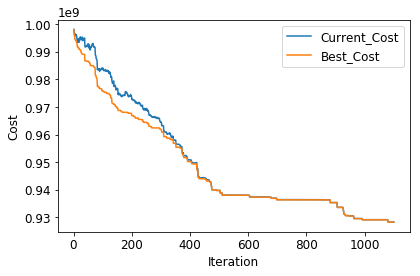

In [370]:
#average of Current_Cost and Best_Cost plot
plt.plot(sa_combine.groupby('Iteration_Number').mean().Current_Cost)
plt.plot(sa_combine.groupby('Iteration_Number').mean().Best_Cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Current_Cost','Best_Cost'])
plt.tight_layout()

In [371]:
table = sa_combine.groupby('Iteration_Number')

In [372]:
# mean at at 1000th iteration
table.mean().loc[1000]

Current_Cost    9.291423e+08
Best_Cost       9.290954e+08
Name: 1000.0, dtype: float64

In [373]:
# standard deviation at at 1000th iteration
table.std().loc[1000]

Current_Cost    2.328933e+07
Best_Cost       2.322266e+07
Name: 1000.0, dtype: float64

In [374]:
# Average CPU time
print("Average CPU Time: %.5fs" %np.mean(cpu_time))

Average CPU Time: 0.03657s


## c)

In [375]:
np.random.seed(100)

beta = 1
G = 1000
M = 1
Max_time = 1100
P_1 = 0.7
P_2 = 0.05
AP = 20

param = SAparameter(beta, G, M, Max_time, P_1, P_2, AP)
print('T_0, T_2, alpha: \n', param)

T_0, T_2, alpha: 
 [2139621.8908259817, 254745.5674518866, 0.99787414370651717]


In [376]:
T_0 = param[0]
alpha = param[2]


sa_combine_part_c = SA(Z[0], T_0, alpha, beta, M, Max_time)[0]

for i in range(1,30):
    sa_combine_part_c = sa_combine_part_c.append(SA(Z[i], T_0, alpha, beta, M, Max_time)[0])

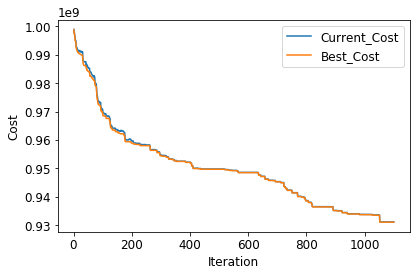

In [377]:
#average of Current_Cost and Best_Cost plot
plt.plot(sa_combine_part_c.groupby('Iteration_Number').mean().Current_Cost)
plt.plot(sa_combine_part_c.groupby('Iteration_Number').mean().Best_Cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Current_Cost','Best_Cost'])
plt.tight_layout()

In [382]:
table = sa_combine.groupby('Iteration_Number')
# mean at at 1100th iteration
table.mean().loc[1100]['Best_Cost']

928236534.43294871

In [383]:
table_part_c = sa_combine_part_c.groupby('Iteration_Number')
# mean at at 1100th iteration
table_part_c.mean().loc[1100]['Best_Cost']

931077824.74818337